In [1]:
import pandas as pd
import numpy as np

In [2]:
import altair as alt

In [21]:
data = pd.read_csv('C:/Users/Akhilesh/Downloads/BoC/dates.csv')

In [22]:
data.head(5)

,Unnamed: 0,y,ds
0,0,16438080.0,2017-04-12
1,1,20877600.0,2017-11-12
2,2,27717240.0,2017-12-18
3,3,40975588.8,2017-12-25
4,4,58789328.4,2018-01-01


In [4]:
data['Category'].value_counts() / len(data)

Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64

In [5]:
data['Sub-Category'].value_counts() / len(data)

Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Art            0.079648
Accessories    0.077547
Chairs         0.061737
Appliances     0.046628
Labels         0.036422
Tables         0.031919
Envelopes      0.025415
Bookcases      0.022814
Fasteners      0.021713
Supplies       0.019011
Machines       0.011507
Copiers        0.006804
Name: Sub-Category, dtype: float64

In [6]:
sub = data[data["Category"] == "Office Supplies"]

In [7]:
sub = data[data["Sub-Category"] == "Binders"]

In [8]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 8 to 9979
Data columns (total 21 columns):
id               1523 non-null int64
Order ID         1523 non-null object
Order Date       1523 non-null object
Ship Date        1523 non-null object
Ship Mode        1523 non-null object
Customer ID      1523 non-null object
Customer Name    1523 non-null object
Segment          1523 non-null object
Country          1523 non-null object
City             1523 non-null object
State            1523 non-null object
Postal Code      1523 non-null int64
Region           1523 non-null object
Product ID       1523 non-null object
Category         1523 non-null object
Sub-Category     1523 non-null object
Product Name     1523 non-null object
Sales            1523 non-null float64
Quantity         1523 non-null int64
Discount         1523 non-null float64
Profit           1523 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 261.8+ KB


In [5]:
print(data.columns.values)

['id' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


In [6]:
for c in list(data.columns):
    
    # get a list of unique values
    n = data[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

id: 9994 unique values
Order ID: 5009 unique values
Order Date: 1237 unique values
Ship Date: 1334 unique values
Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID: 793 unique values
Customer Name: 793 unique values
Segment
['Consumer' 'Corporate' 'Home Office']
Country
['United States']
City: 531 unique values
State: 49 unique values
Postal Code: 631 unique values
Region
['South' 'West' 'Central' 'East']
Product ID: 1862 unique values
Category
['Furniture' 'Office Supplies' 'Technology']
Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Product Name: 1850 unique values
Sales: 5825 unique values
Quantity
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
Discount
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]
Profit: 7287 unique values


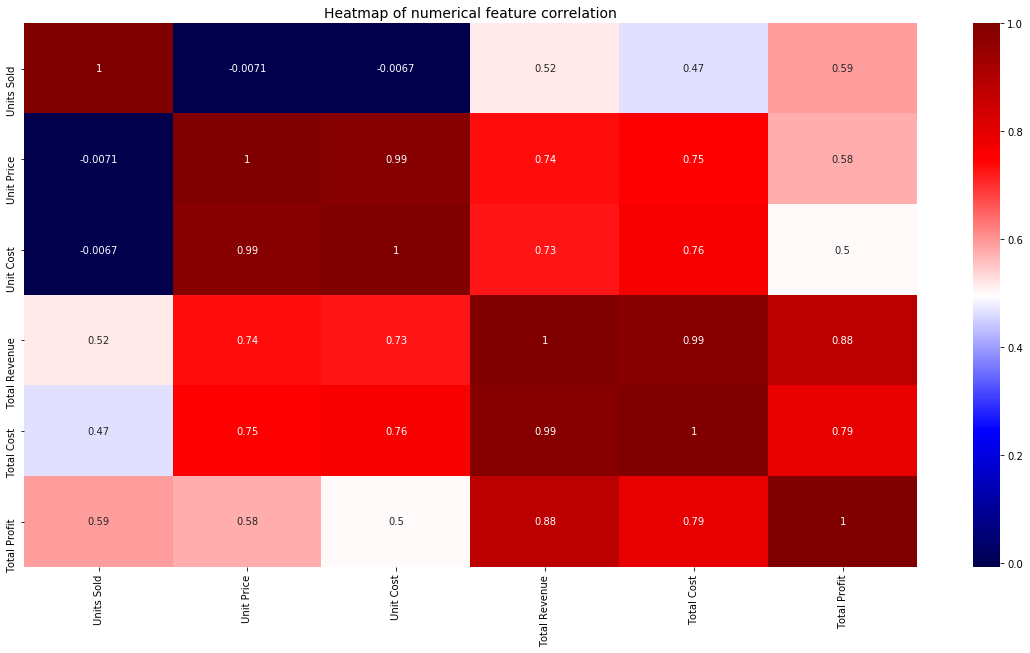

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

numeric_list=['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']
numeric_features_corr = data[numeric_list].corr()
plt.figure(figsize=(20,10))
sns.heatmap(numeric_features_corr, annot=True, cmap='seismic')
plt.xticks(rotation=90); plt.title('Heatmap of numerical feature correlation', size=14);

In [6]:
data.tail(5)

,id,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,21-01-2014,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,26-02-2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,04-05-2017,09-05-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [9]:
col = ['Order Date','Sales']

df = sub[col]

In [12]:
data.head(5)

,Unnamed: 0,y,ds
0,0,27386400.0,2017-12-01
1,1,30356760.0,2017-12-02
2,2,19797480.0,2017-12-03
3,3,16438080.0,2017-12-04
4,4,14638200.0,2017-12-05


In [25]:
sub = sub.drop(['Unnamed: 0'],axis=1)

In [6]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [12]:
df['ODate'] = pd.DatetimeIndex(df['Order Date'])
df.dtypes

C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Order Date    datetime64[ns]
Sales                float64
dtype: object

In [23]:
sub = data[data['ds'] >= '2018-01-02']

sub.tail(5)

,Unnamed: 0,y,ds
17,17,13970984.4,2018-05-03
18,18,13138440.0,2018-08-01
19,19,27956880.0,2018-09-04
20,20,5279400.0,2018-12-02
21,21,16584460.8,2018-12-03


In [21]:
ax = data.set_index('ds').plot(figsize=(12, 8))

plt.show()

AttributeError: No dataset named 'set_index'

In [22]:
my_model = Prophet(interval_width=0.99,yearly_seasonality=True,weekly_seasonality=True)

In [23]:
my_model.fit(data)

TypeError: argument of type 'DataLoader' is not iterable

In [17]:
future_dates = my_model.make_future_dataframe(periods=2, freq='D')
future_dates.tail()

,ds
1520,2017-12-30
1521,2017-12-30
1522,2017-12-30
1523,2017-12-31
1524,2018-01-01


In [18]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1520,2017-12-30,172.070308,-1145.803042,1681.837332
1521,2017-12-30,172.070308,-1198.113278,1568.328573
1522,2017-12-30,172.070308,-1350.069477,1563.763141
1523,2017-12-31,130.010744,-1346.899353,1555.060345
1524,2018-01-01,163.800699,-1373.328776,1505.819687


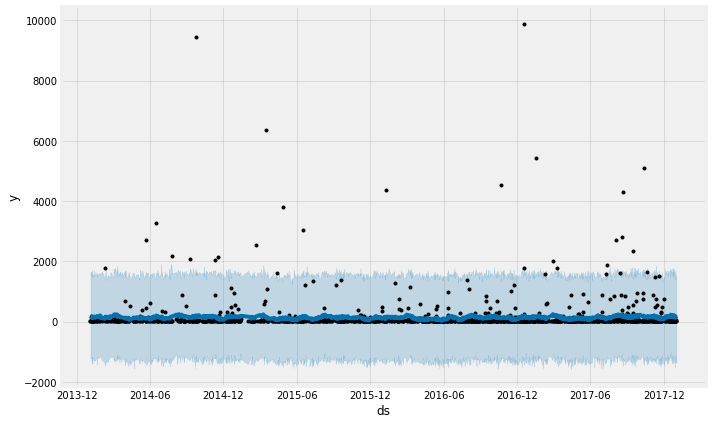

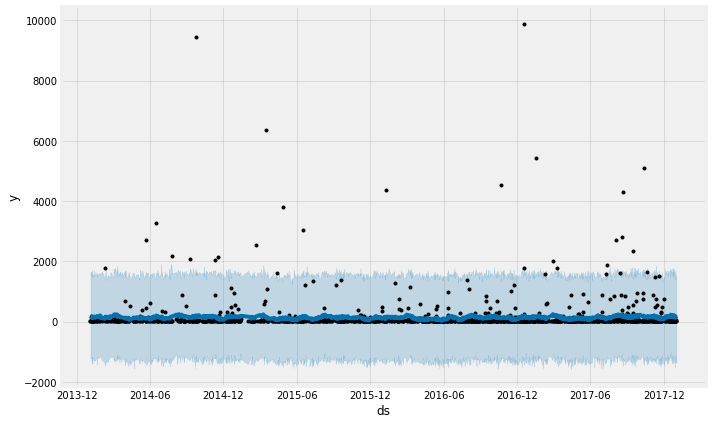

In [20]:
my_model.plot(forecast,uncertainty=True)

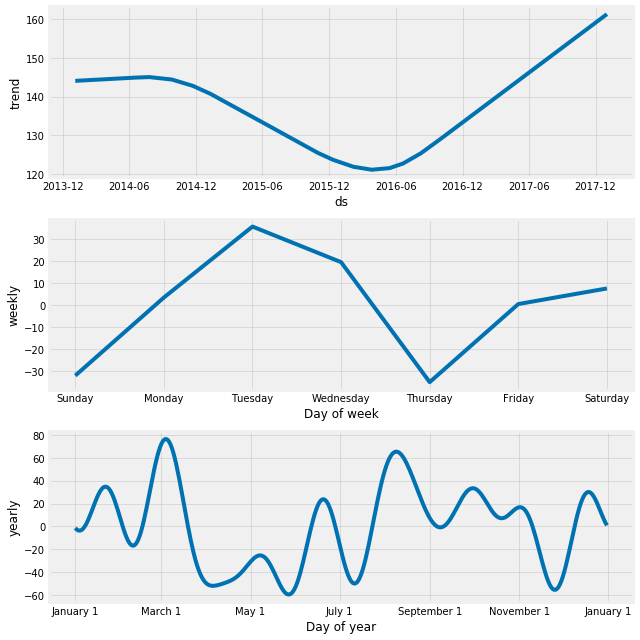

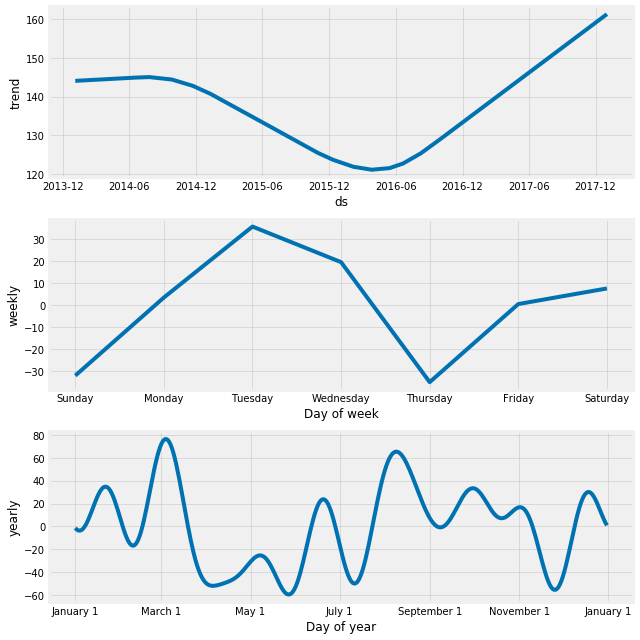

In [80]:
my_model.plot_components(forecast)

In [26]:
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = True,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast
    
pred = fit_predict_model(sub)

INFO:fbprophet:n_changepoints greater than number of observations.Using 12.


In [27]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)

In [28]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

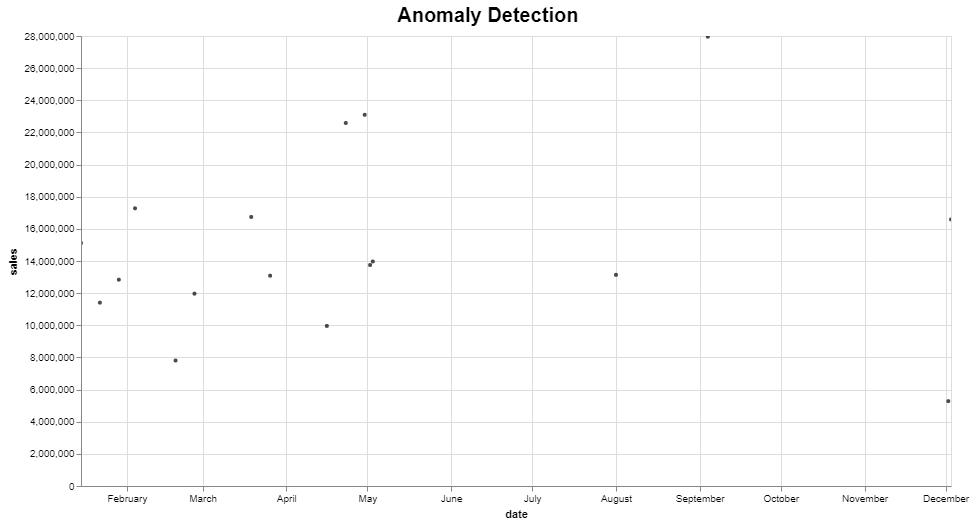

In [29]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)
              
plot_anomalies(pred)

In [35]:
sub = df[(df['ds'] > '2016-10-15') & (df['ds'] <= '2016-11-01')]

In [36]:
sub.head(5)

,ds,y
60,2016-10-28,93.06
79,2016-10-28,32.40
80,2016-10-28,1082.48
81,2016-10-28,56.91
83,2016-10-28,14.28


In [37]:
df = df.groupby('ds',as_index=False).agg({"y":sum})

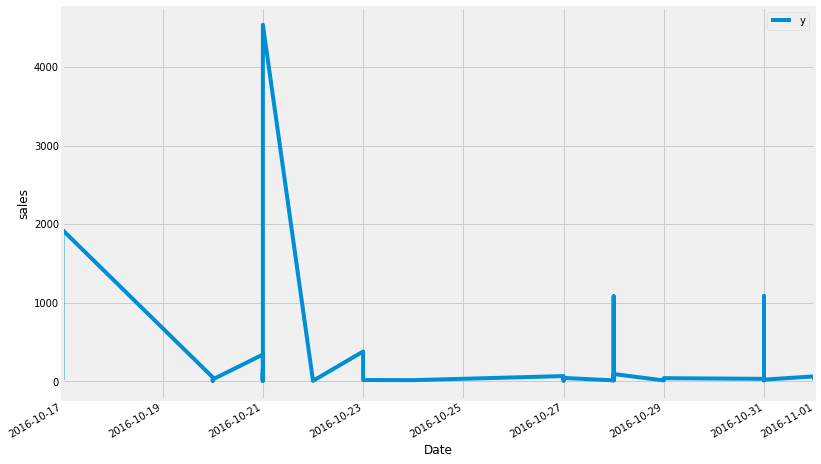

In [38]:
ax = sub.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('sales')
ax.set_xlabel('Date')

plt.show()

In [64]:
my_model = Prophet(interval_width=0.95,yearly_seasonality=True)

In [65]:
my_model.fit(sub)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future_dates = my_model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
955,2016-12-26
956,2016-12-27
957,2016-12-28
958,2016-12-29
959,2016-12-30


In [67]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
955,2016-12-26,2779.835980,-1306.850056,6738.848185
956,2016-12-27,3061.466195,-828.627925,7165.200074
957,2016-12-28,2181.112643,-1789.665018,6162.372353
958,2016-12-29,2412.232743,-1557.092754,6384.312226
959,2016-12-30,2758.295083,-1288.823738,6965.632933


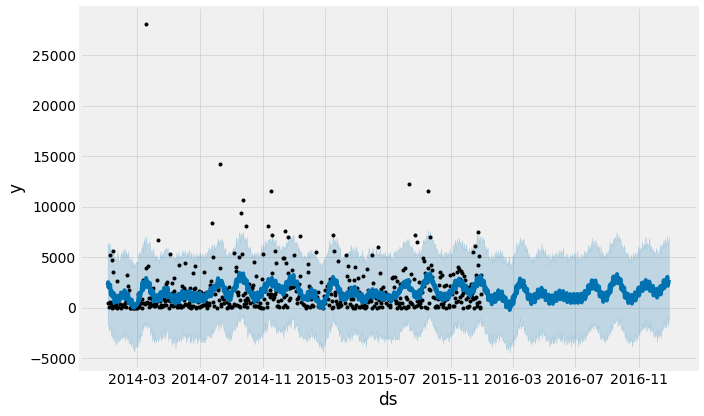

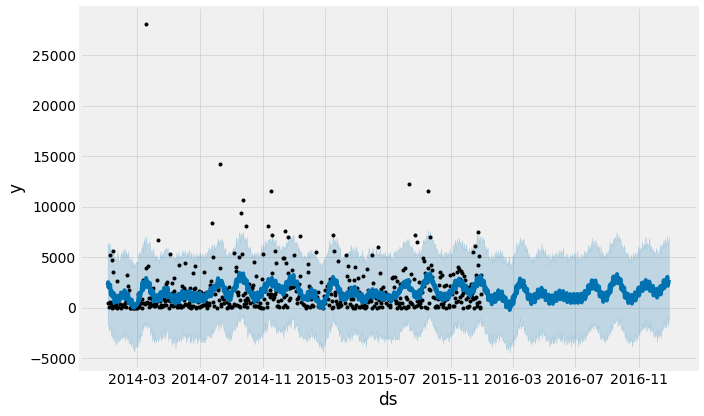

In [68]:
my_model.plot(forecast,uncertainty=True)

In [69]:
sub_gen = forecast[['ds', 'yhat']]

In [70]:
sub_gen.head()

,ds,yhat
0,2014-01-02,2245.471378
1,2014-01-03,2537.320968
2,2014-01-04,2020.149038
3,2014-01-06,2141.640270
4,2014-01-07,2287.207436


In [71]:
sub_gen.to_csv("C:/Users/Akhilesh/Downloads/BoC/sub_gen.csv")

In [62]:
original = forecast[['ds', 'yhat']]

In [63]:
original.to_csv("C:/Users/Akhilesh/Downloads/BoC/original.csv")

In [87]:
error = pd.read_csv("C:/Users/Akhilesh/Downloads/BoC/original.csv")

In [92]:
error.head(5)

,orginal,o_value,generated,g_value
0,02-01-2016,2596.969097,02-01-2016,2318.975251
1,03-01-2016,2835.548249,03-01-2016,2278.278135
2,04-01-2016,2841.992918,04-01-2016,2487.441125
3,05-01-2016,2609.973014,05-01-2016,2648.358070
4,07-01-2016,2299.966194,06-01-2016,1655.363704


In [110]:
abse = pd.DataFrame(columns = ['date','error'],index=range(len(error)))

In [113]:
for i in range(len(error)):
    for j in range(len(abse)):
        if error[error.columns[0]][i] == error[error.columns[2]][j]:
            abse['date'][i] = error[error.columns[0]][j]
            abse['error'][i] = abs(error[error.columns[1]][j] - error[error.columns[3]][j])
            break
        else:
            continue

In [120]:
abse = pd.read_csv("C:/Users/Akhilesh/Downloads/BoC/error.csv")

In [121]:
abse.head(5)

,date,error
0,02-01-2016,277.993846
1,03-01-2016,557.270114
2,04-01-2016,354.551793
3,05-01-2016,38.385056
4,08-01-2016,820.316047


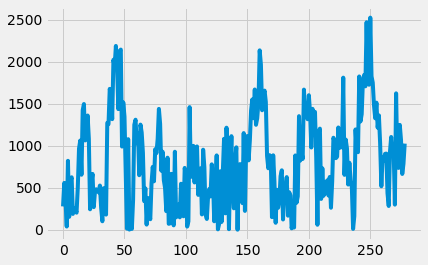

In [122]:
plt.plot(abse['error'])

In [124]:
abse.describe()

,error
count,279.000000
mean,822.313614
std,537.486567
min,0.649222
25%,406.304446
50%,781.416624
75%,1174.048272
max,2524.704996


In [126]:
abse['class'] = 0

In [127]:
for i in range(len(abse)):
    if abse['error'][i] > 800:
        abse['class'][i] = 1
    else:
        abse['class'][i] = 0

C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
abse

,date,error,class
0,02-01-2016,277.993846,0
1,03-01-2016,557.270114,0
2,04-01-2016,354.551793,0
3,05-01-2016,38.385056,0
4,08-01-2016,820.316047,1
...,...,...,...
274,26-12-2016,1247.947653,1
275,27-12-2016,1066.789085,1
276,29-12-2016,664.142041,0
277,30-12-2016,785.459953,0


In [130]:
abse = abse.rename(columns={'date':'Order Date','error':'error','class':'class'})
abse.head(5)

,Order Date,error,class
0,02-01-2016,277.993846,0
1,03-01-2016,557.270114,0
2,04-01-2016,354.551793,0
3,05-01-2016,38.385056,0
4,08-01-2016,820.316047,1


In [131]:
final = data.merge(abse, on='Order Date', how='left')

In [132]:
final.head()

,id,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,error,class
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,501.138766,0.0
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,501.138766,0.0
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,952.641266,1.0
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN,NaN
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN,NaN


In [4]:
final = final.dropna()

In [5]:
final['Category'].value_counts() / len(final)

Office Supplies    0.605896
Furniture          0.220862
Technology         0.173243
Name: Category, dtype: float64

In [3]:
final = pd.read_csv("C:/Users/Akhilesh/Downloads/BoC/final.csv")

In [14]:
sub1 = final[final["Category"] == "Office Supplies"]

In [39]:
sub1 = final[final["Sub-Category"] == "Binders"]

In [15]:
sub1['Sub-Category'].value_counts() / len(sub1)

Binders       0.267964
Paper         0.234281
Storage       0.137725
Art           0.118263
Appliances    0.071856
Labels        0.060629
Supplies      0.036677
Fasteners     0.036677
Envelopes     0.035928
Name: Sub-Category, dtype: float64

In [40]:
col = ['Order Date','Sales']

df = sub1[col]

In [137]:
for c in list(final.columns):
    
    # get a list of unique values
    n = final[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

id: 2205 unique values
Order ID: 1113 unique values
Order Date: 267 unique values
Ship Date: 325 unique values
Ship Mode
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID: 597 unique values
Customer Name: 597 unique values
Segment
['Consumer' 'Corporate' 'Home Office']
Country
['United States']
City: 290 unique values
State: 44 unique values
Postal Code: 364 unique values
Region
['South' 'West' 'Central' 'East']
Product ID: 1272 unique values
Category
['Furniture' 'Office Supplies' 'Technology']
Sub-Category
['Bookcases' 'Chairs' 'Labels' 'Binders' 'Art' 'Appliances' 'Accessories'
 'Phones' 'Furnishings' 'Storage' 'Fasteners' 'Paper' 'Envelopes'
 'Supplies' 'Tables' 'Machines' 'Copiers']
Product Name: 1265 unique values
Sales: 1829 unique values
Quantity
[ 2  3  7  5  6  4  1  9 14 11  8 13 10 12]
Discount
[0.   0.2  0.6  0.1  0.5  0.7  0.4  0.32 0.3  0.8  0.45 0.15]
Profit: 1988 unique values
error: 267 unique values
class
[0. 1.]


In [186]:
col = ['Ship Mode','Segment','State','Region','Category','Sub-Category','Quantity','Discount','Profit','class']

In [187]:
final_sub = final[col]

In [188]:
final_sub.dtypes

Ship Mode        object
Segment          object
State            object
Region           object
Category         object
Sub-Category     object
Quantity          int64
Discount        float64
Profit          float64
class           float64
dtype: object

In [189]:
cat_cols = ['Ship Mode','Segment','State','Region','Category','Sub-Category','Quantity','Discount']

In [190]:
final_sub = pd.get_dummies(final_sub, prefix_sep="__",columns=cat_cols)

In [191]:
final_sub.dtypes

Profit                     float64
class                      float64
Ship Mode__First Class       uint8
Ship Mode__Same Day          uint8
Ship Mode__Second Class      uint8
                            ...   
Discount__0.45               uint8
Discount__0.5                uint8
Discount__0.6                uint8
Discount__0.7                uint8
Discount__0.8                uint8
Length: 103, dtype: object

In [192]:
final_sub['class'] = final_sub['class'].astype('str')

In [193]:
final_sub.dtypes

Profit                     float64
class                       object
Ship Mode__First Class       uint8
Ship Mode__Same Day          uint8
Ship Mode__Second Class      uint8
                            ...   
Discount__0.45               uint8
Discount__0.5                uint8
Discount__0.6                uint8
Discount__0.7                uint8
Discount__0.8                uint8
Length: 103, dtype: object

In [205]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix,accuracy_score)

In [194]:
x=final_sub.drop(['class'],axis=1)
y=final_sub['class']

In [195]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=50)

In [206]:
qda_model=LDA()
qda_model.fit(X_train,y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [207]:
y_pred = qda_model.predict(X_test)

In [208]:
accuracy_score(y_test, y_pred)

0.54421768707483

In [209]:
print(confusion_matrix(y_test, y_pred))

[[ 98  99]
 [102 142]]


In [210]:
def main():
    d = {}
    d['a'] = 33
    d['b'] = 44
    return len(d)


In [211]:
print(main())

2


In [212]:
final_sub.to_csv("C:/Users/Akhilesh/Downloads/BoC/final_sub.csv")

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
output = pd.read_csv("C:/Users/Akhilesh/Downloads/BoC/output.csv")

In [26]:
output.head(5)

,Unnamed: 0,X,Average.Cost..avg_cost_unit_sold...qty.sold.,Unit.Retail.Price.Discount,Unit.Price.Sold,Net.Sold.Amount,TAX.RATE,TAX.AMOUNT1,LINE.ID__1,LINE.ID__2,...,Week__Friday,Week__Monday,Week__Saturday,Week__Sunday,Week__Thursday,Week__Tuesday,Week__Wednesday,Day__Normal,Day__Saturday,Day__Sunday
0,0,123.585366,529812.255122,588729.639024,956606.312195,567467.082927,5.772358,42990.146341,0.479675,0.325203,...,0.195122,0.138211,0.000000,0.000000,0.211382,0.146341,0.308943,1.00000,0.000000,0.000000
1,1,341.027778,553843.056759,621216.733333,966267.522222,618767.977778,6.111111,46876.629630,0.574074,0.259259,...,0.009259,0.120370,0.287037,0.583333,0.000000,0.000000,0.000000,0.12963,0.287037,0.583333


In [34]:
impacted = []
for i in output.columns:
    if output[i].iloc[0] < 0.4* output[i].iloc[1]:
        impacted.append(i)


C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


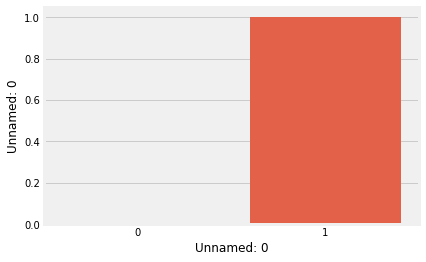

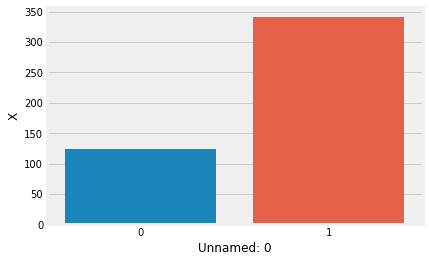

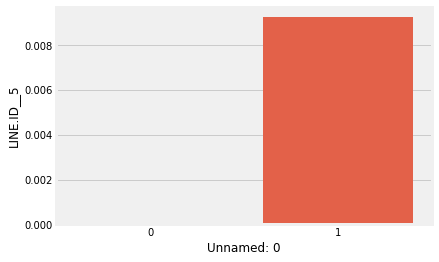

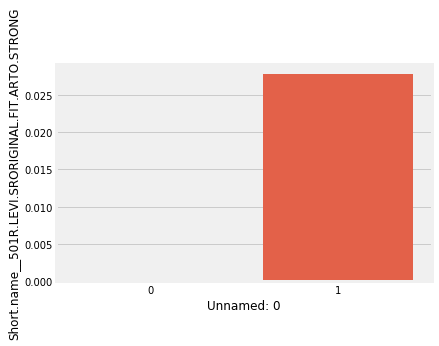

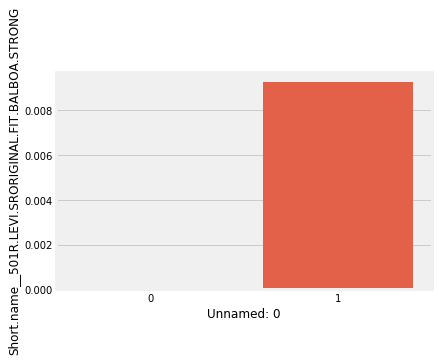

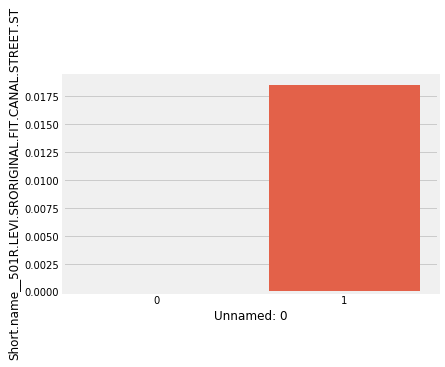

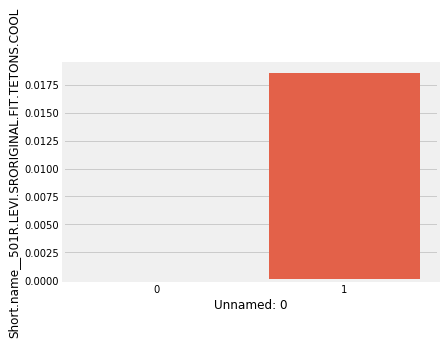

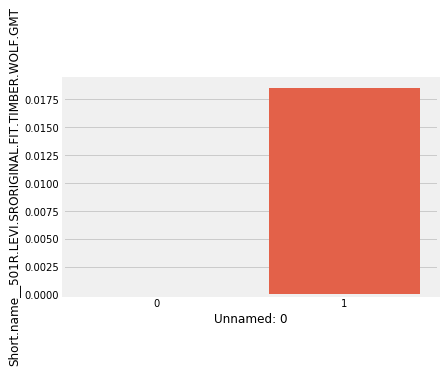

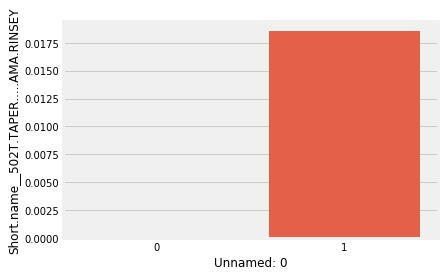

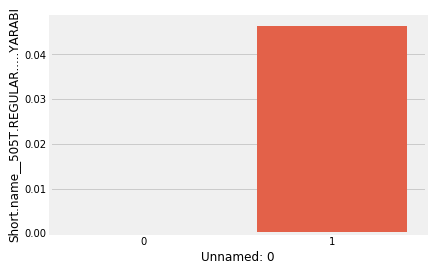

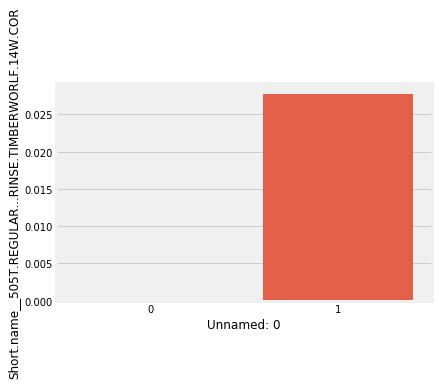

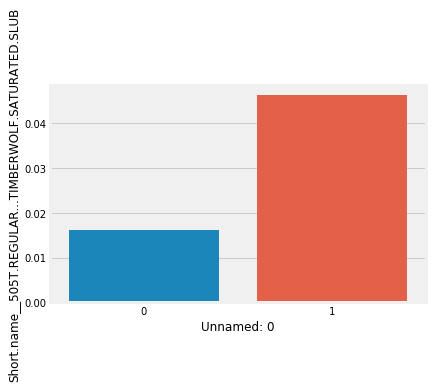

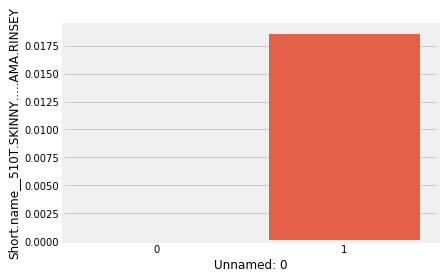

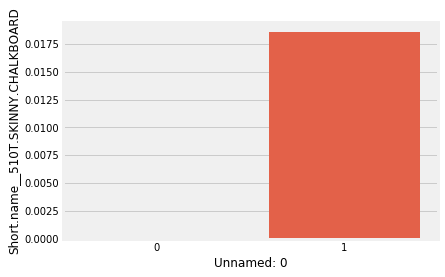

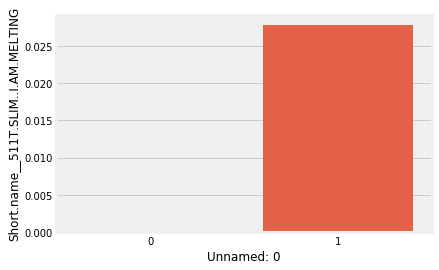

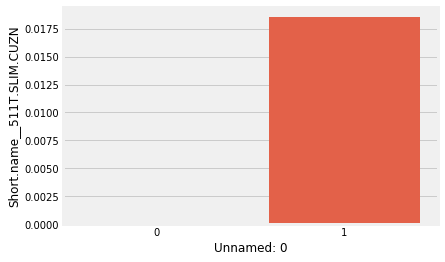

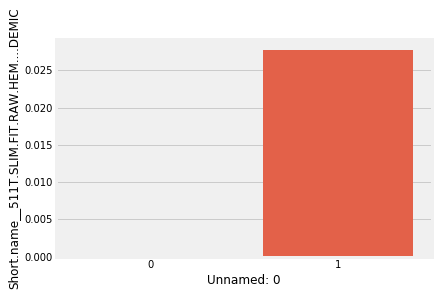

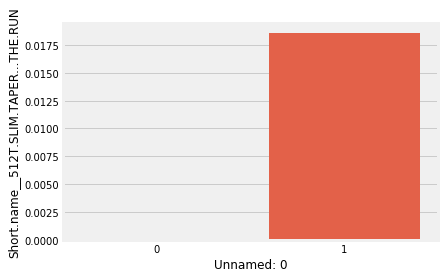

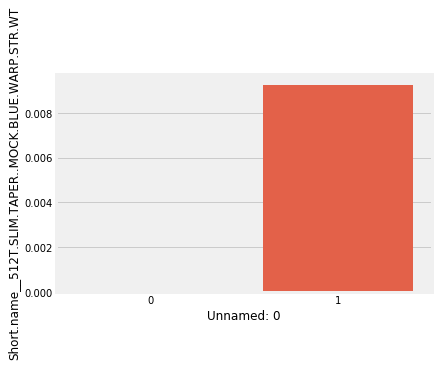

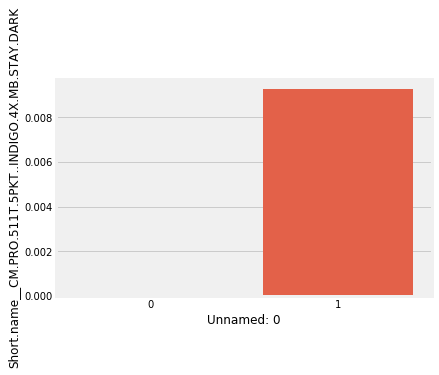

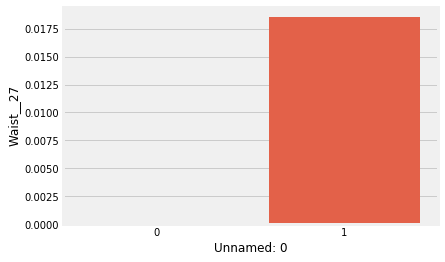

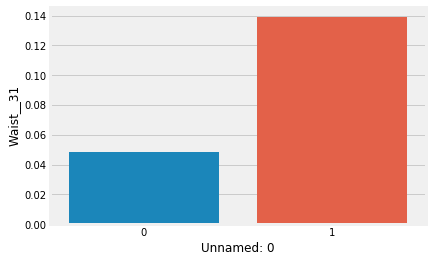

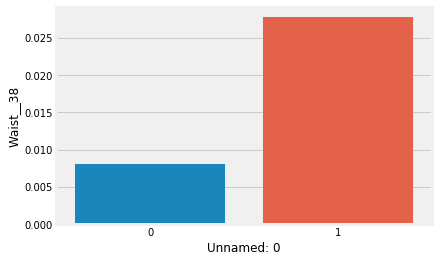

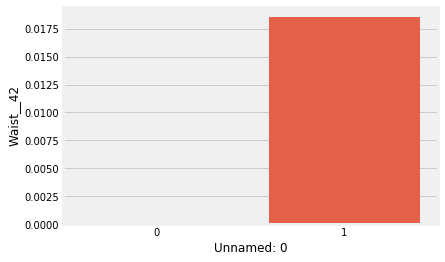

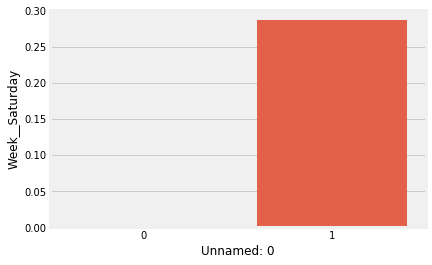

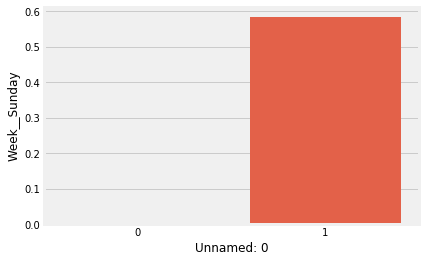

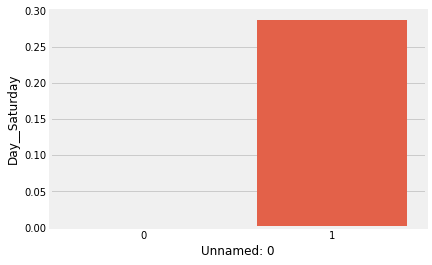

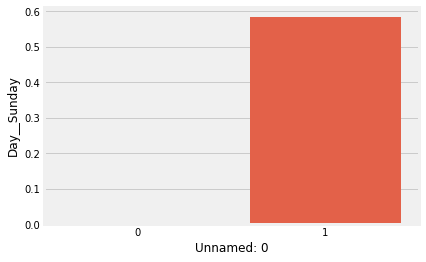

In [35]:
out_impacted = output[impacted]

for i in range(len(out_impacted.columns)):
    plt.figure(i)
    sns.barplot(x="Unnamed: 0",y=out_impacted.columns[i],data=out_impacted)